# Extensión de demanda anual de hidrógeno hasta 2100
Este notebook proyecta la demanda anual de hidrógeno (H₂) hasta el año 2100 usando regresión lineal sobre los datos históricos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 1. Cargar demanda histórica
Se carga el archivo demand_annual.csv.

In [5]:
df = pd.read_csv('/home/aninotna/magister/tesis/justh2_pipeline/scripts/calliope_v5/data/demand_annual.csv') if not pd.io.common.file_exists('demand_annual.csv') else pd.read_csv('demand_annual.csv')
df['year'] = pd.to_datetime(df['year']).dt.year
df = df.sort_values('year')
df.head()

,year,demand_TWh
0,2023,0.00
1,2024,0.05
2,2025,0.15
3,2026,0.29
4,2027,0.44


## 2. Ajustar regresión lineal
Se ajusta una regresión lineal sobre los datos históricos.

In [6]:
X = df['year'].values.reshape(-1, 1)
y = df['demand_TWh'].values
model = LinearRegression()
model.fit(X, y)
print(f'Pendiente: {model.coef_[0]:.4f} TWh/año, Intercepto: {model.intercept_:.2f} TWh')

Pendiente: 0.6165 TWh/año, Intercepto: -1248.95 TWh


## 3. Proyectar demanda hasta 2100
Se genera la proyección anual hasta 2100.

In [7]:
years_proj = np.arange(df['year'].min(), 2101)
demand_proj = model.predict(years_proj.reshape(-1, 1))
df_proj = pd.DataFrame({'year': years_proj, 'demand_TWh': demand_proj})

## 4. Visualizar demanda histórica y proyectada

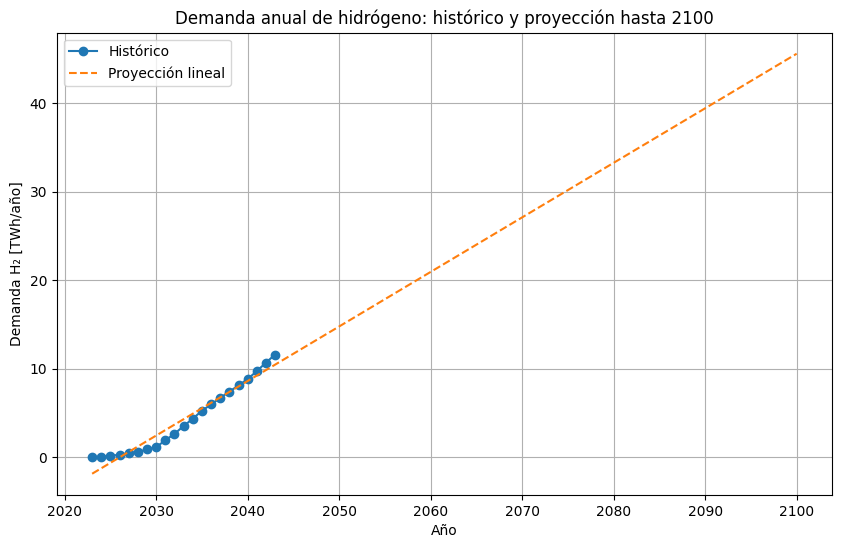

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df['year'], df['demand_TWh'], 'o-', label='Histórico')
plt.plot(df_proj['year'], df_proj['demand_TWh'], '--', label='Proyección lineal')
plt.xlabel('Año')
plt.ylabel('Demanda H₂ [TWh/año]')
plt.title('Demanda anual de hidrógeno: histórico y proyección hasta 2100')
plt.legend()
plt.grid(True)
plt.show()

## 5. Exportar proyección a CSV
Se guarda la proyección en extender_demanda_h2_2100.csv para uso en Calliope y otros modelos.

In [ ]:
df_proj.to_csv('/home/aninotna/magister/tesis/justh2_pipeline/scripts/calliope_v5/data/extend_demand_h2_2100.csv', index=False)